# CHAPTER 2-How to scrape Understat for football data in Python with requests and BeautifulSoup and plotting xg shot map

# CONTENTS
# 1- SCRAPING AND PREPROCESSING DATA
# 2- MAPPING USING MPL SOCCER
# 3- USING MANUAL PITCH

In [48]:
#import modules and packages
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [49]:
#scrape a single game shots. We will allow users to enter a base url
base_url = 'https://understat.com/match/'
match = str(input('Please enter the match id: '))
url = base_url+match

Please enter the match id:  18282


In [50]:
url

'https://understat.com/match/18282'

In [51]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [52]:
#get only the shotsData
strings = scripts[1].string

In [53]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

In [54]:
data

{'h': [{'id': '489829',
   'minute': '2',
   'result': 'SavedShot',
   'X': '0.9290000152587891',
   'Y': '0.695',
   'xG': '0.029694300144910812',
   'player': 'Gabriel Martinelli',
   'h_a': 'h',
   'player_id': '7752',
   'situation': 'OpenPlay',
   'season': '2022',
   'shotType': 'RightFoot',
   'match_id': '18282',
   'h_team': 'Arsenal',
   'a_team': 'Tottenham',
   'h_goals': '3',
   'a_goals': '1',
   'date': '2022-10-01 11:30:00',
   'player_assisted': 'Bukayo Saka',
   'lastAction': 'Cross'},
  {'id': '489830',
   'minute': '3',
   'result': 'MissedShots',
   'X': '0.9569999694824218',
   'Y': '0.6630000305175782',
   'xG': '0.032986830919981',
   'player': 'Granit Xhaka',
   'h_a': 'h',
   'player_id': '204',
   'situation': 'OpenPlay',
   'season': '2022',
   'shotType': 'LeftFoot',
   'match_id': '18282',
   'h_team': 'Arsenal',
   'a_team': 'Tottenham',
   'h_goals': '3',
   'a_goals': '1',
   'date': '2022-10-01 11:30:00',
   'player_assisted': 'Bukayo Saka',
   'lastAc

In [55]:
x = []
y = []
xG = []
result = []
team = []
minute = []
data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'minute':
            minute.append(data_home[index][key])

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'minute':
            minute.append(data_away[index][key])

In [56]:
col_names = ['x','y','xG','result','team','minute']
df = pd.DataFrame([x,y,xG,result,team,minute],index=col_names)
df = df.T
df = df.sort_values("minute")

In [57]:
df

,x,y,xG,result,team,minute
22,0.9119999694824219,0.4909999847412109,0.46723130345344543,SavedShot,Tottenham,12
2,0.7769999694824219,0.34299999237060547,0.019670892506837845,SavedShot,Arsenal,13
3,0.7669999694824219,0.27299999237060546,0.01658448576927185,MissedShots,Arsenal,15
4,0.7290000152587891,0.6719999694824219,0.016309672966599464,MissedShots,Arsenal,16
5,0.7669999694824219,0.40400001525878904,0.023805344477295876,Goal,Arsenal,19
0,0.9290000152587891,0.695,0.029694300144910812,SavedShot,Arsenal,2
23,0.9,0.7140000152587891,0.043517760932445526,MissedShots,Tottenham,27
1,0.9569999694824218,0.6630000305175782,0.032986830919981,MissedShots,Arsenal,3
24,0.885,0.5,0.7611688375473022,Goal,Tottenham,30
25,0.9180000305175782,0.4540000152587891,0.14809376001358032,SavedShot,Tottenham,37


In [58]:
liga = df

## PLOTTING SHOT MAP

PART 2 : PLOTTING THIS DATA

In [17]:
pip install mplsoccer

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from highlight_text import fig_text
import matplotlib as mpl
from mplsoccer.pitch import Pitch, VerticalPitch

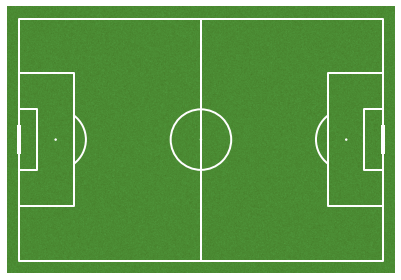

In [19]:
from mplsoccer.pitch import Pitch
pitch = Pitch(pitch_color='grass', line_color='white', stripe=False)
fig, ax = pitch.draw()

In [20]:
#scaling from 100,100 to 120,80

# Convert single column to int dtype.
df['x'] = df['x'].astype('float')

df['scaled_x'] = (df['x']*100)*1.2

# Convert single column to int dtype.
df['xG'] = df['xG'].astype('float')

df['y'] = df['y'].astype('float')

df['scaled_y'] = (df['y']*100)*0.8
df

,x,y,xG,result,team,minute,scaled_x,scaled_y
22,0.912,0.491,0.467231,SavedShot,Tottenham,12,109.439996,39.279999
2,0.777,0.343,0.019671,SavedShot,Arsenal,13,93.239996,27.439999
3,0.767,0.273,0.016584,MissedShots,Arsenal,15,92.039996,21.839999
4,0.729,0.672,0.016310,MissedShots,Arsenal,16,87.480002,53.759998
5,0.767,0.404,0.023805,Goal,Arsenal,19,92.039996,32.320001
0,0.929,0.695,0.029694,SavedShot,Arsenal,2,111.480002,55.600000
23,0.900,0.714,0.043518,MissedShots,Tottenham,27,108.000000,57.120001
1,0.957,0.663,0.032987,MissedShots,Arsenal,3,114.839996,53.040002
24,0.885,0.500,0.761169,Goal,Tottenham,30,106.200000,40.000000
25,0.918,0.454,0.148094,SavedShot,Tottenham,37,110.160004,36.320001


In [21]:
df.dtypes

x           float64
y           float64
xG          float64
result       object
team         object
minute       object
scaled_x    float64
scaled_y    float64
dtype: object

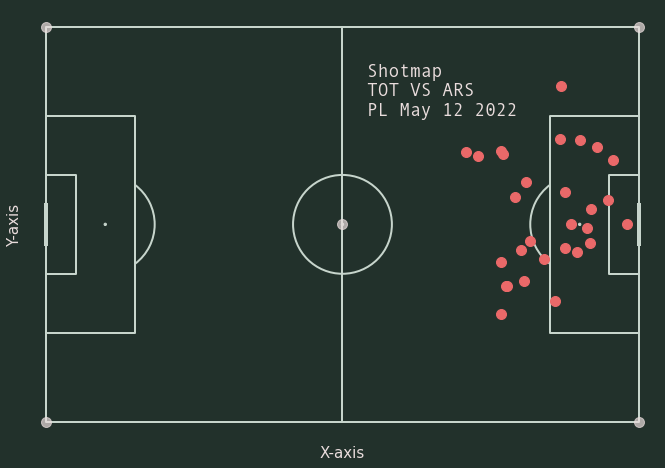

In [22]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#this is how we create the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_yaxis()
plt.scatter(df['scaled_x'],df['scaled_y'], s=100,c='#ea6969',alpha=1)
plt.scatter(0,80, s=100,c='#eadddd',alpha=.7)
plt.scatter(120,80, s=100,c='#eadddd',alpha=.7)
plt.scatter(0,0, s=100,c='#eadddd',alpha=.7)
plt.scatter(120,0, s=100,c='#eadddd',alpha=.7)
plt.scatter(60,40, s=100,c='#eadddd',alpha=.7)


#adding text inside the plot
plt.text(65, 62, 'Shotmap\nTOT VS ARS\nPL May 12 2022',fontfamily='Andale Mono', fontsize = 18,c='#eadddd')

  
plt.xlabel("X-axis", fontsize = 15,c='#eadddd')
plt.ylabel("Y-axis",fontsize = 15,c='#eadddd')
  
plt.show()

## PLOTTING SHOT MAP BASED ON TEAM,RESULT AND xG

In [23]:
df

,x,y,xG,result,team,minute,scaled_x,scaled_y
22,0.912,0.491,0.467231,SavedShot,Tottenham,12,109.439996,39.279999
2,0.777,0.343,0.019671,SavedShot,Arsenal,13,93.239996,27.439999
3,0.767,0.273,0.016584,MissedShots,Arsenal,15,92.039996,21.839999
4,0.729,0.672,0.016310,MissedShots,Arsenal,16,87.480002,53.759998
5,0.767,0.404,0.023805,Goal,Arsenal,19,92.039996,32.320001
0,0.929,0.695,0.029694,SavedShot,Arsenal,2,111.480002,55.600000
23,0.900,0.714,0.043518,MissedShots,Tottenham,27,108.000000,57.120001
1,0.957,0.663,0.032987,MissedShots,Arsenal,3,114.839996,53.040002
24,0.885,0.500,0.761169,Goal,Tottenham,30,106.200000,40.000000
25,0.918,0.454,0.148094,SavedShot,Tottenham,37,110.160004,36.320001


In [24]:
ars = df[df['team'] == "Arsenal"]
ars


,x,y,xG,result,team,minute,scaled_x,scaled_y
2,0.777,0.343,0.019671,SavedShot,Arsenal,13,93.239996,27.439999
3,0.767,0.273,0.016584,MissedShots,Arsenal,15,92.039996,21.839999
4,0.729,0.672,0.016310,MissedShots,Arsenal,16,87.480002,53.759998
5,0.767,0.404,0.023805,Goal,Arsenal,19,92.039996,32.320001
0,0.929,0.695,0.029694,SavedShot,Arsenal,2,111.480002,55.600000
1,0.957,0.663,0.032987,MissedShots,Arsenal,3,114.839996,53.040002
6,0.866,0.717,0.028574,BlockedShot,Arsenal,38,103.919998,57.359998
7,0.947,0.561,0.250967,SavedShot,Arsenal,42,113.639996,44.879999
8,0.876,0.440,0.091959,MissedShots,Arsenal,44,105.119998,35.200000
9,0.809,0.608,0.039196,BlockedShot,Arsenal,46,97.080002,48.639999


In [25]:
asumXg = ars['xG'].sum()     
print(asumXg)

2.4840336544439197


In [26]:
spurs = df[df['team'] == "Tottenham"]
spurs

,x,y,xG,result,team,minute,scaled_x,scaled_y
22,0.912,0.491,0.467231,SavedShot,Tottenham,12,109.439996,39.279999
23,0.900,0.714,0.043518,MissedShots,Tottenham,27,108.000000,57.120001
24,0.885,0.500,0.761169,Goal,Tottenham,30,106.200000,40.000000
25,0.918,0.454,0.148094,SavedShot,Tottenham,37,110.160004,36.320001
26,0.806,0.356,0.022790,BlockedShot,Tottenham,50,96.719998,28.479999
27,0.801,0.436,0.039228,MissedShots,Tottenham,58,96.119998,34.879999
28,0.771,0.677,0.020665,BlockedShot,Tottenham,77,92.519998,54.159998


In [27]:
ssumXg = spurs['xG'].sum()     
print(ssumXg)

1.5026951879262924


In [28]:
spurs

,x,y,xG,result,team,minute,scaled_x,scaled_y
22,0.912,0.491,0.467231,SavedShot,Tottenham,12,109.439996,39.279999
23,0.900,0.714,0.043518,MissedShots,Tottenham,27,108.000000,57.120001
24,0.885,0.500,0.761169,Goal,Tottenham,30,106.200000,40.000000
25,0.918,0.454,0.148094,SavedShot,Tottenham,37,110.160004,36.320001
26,0.806,0.356,0.022790,BlockedShot,Tottenham,50,96.719998,28.479999
27,0.801,0.436,0.039228,MissedShots,Tottenham,58,96.119998,34.879999
28,0.771,0.677,0.020665,BlockedShot,Tottenham,77,92.519998,54.159998


In [31]:
home= ars
away = spurs

/var/folders/y9/7jjg2kks2396zw687mh2t7vc0000gn/T/ipykernel_9636/2987467492.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ars['scaledx']= 120-ars['scaled_x']
/var/folders/y9/7jjg2kks2396zw687mh2t7vc0000gn/T/ipykernel_9636/2987467492.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ars['scaledy']= 80-ars['scaled_y']


Text(0.5, 0, 'Blue Star denotes goal : Size of dots corresponds to xG of the shot')

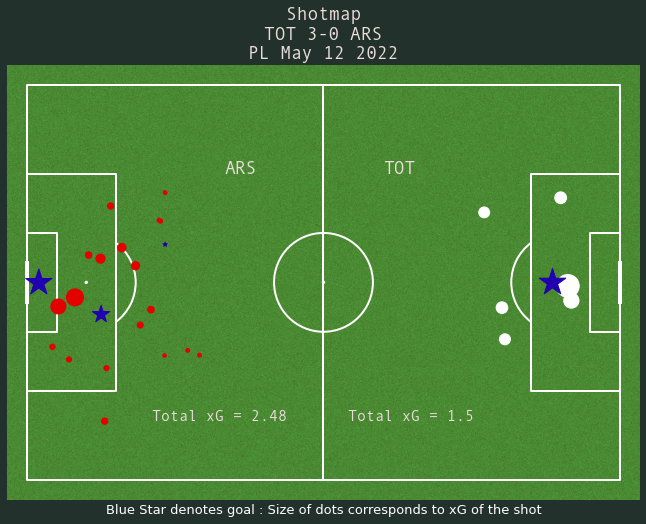

In [32]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#this is how we create the pitch
pitch =Pitch(pitch_type='statsbomb', orientation='horizontal',
             pitch_color='grass', line_color='white', stripe=False,figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

# filter goals / non-shot goals
df_goals_spurs= spurs[spurs["result"] == 'Goal']
df_non_goal_shots_spurs = spurs[spurs["result"] != 'Goal']


plt.scatter(df_non_goal_shots_spurs['scaled_x'],df_non_goal_shots_spurs['scaled_y'], s=(df_non_goal_shots_spurs['xG'] * 900) + 100,c='#ffffff',alpha=1)
plt.scatter(df_goals_spurs['scaled_x'],df_goals_spurs['scaled_y'], s=(df_goals_spurs['xG'] * 900) + 100,marker = '*',c='#2000b1',alpha=1)






#FOR ARSENAL

ars['scaledx']= 120-ars['scaled_x']
ars['scaledy']= 80-ars['scaled_y']

df_gars= ars[ars["result"] == 'Goal']
df_ngars = ars[ars["result"] != 'Goal']

plt.scatter(df_ngars['scaledx'],df_ngars['scaledy'], s=(df_ngars['xG'] * 900),c='#e50000',alpha=1)
plt.scatter(df_gars['scaledx'],df_gars['scaledy'], s=(df_gars['xG'] * 900),marker = '*',c='#2000b1',alpha=1)


#adding text inside the plot
plt.title('Shotmap\nTOT 3-0 ARS\nPL May 12 2022',fontfamily='Andale Mono', fontsize = 18,c='#eadddd')

plt.text(72, 62, 'TOT',fontfamily='Andale Mono', fontsize = 18,c='#eadddd')
plt.text(65, 12, 'Total xG = {:.3}'.format(ssumXg),fontfamily='Andale Mono', fontsize = 15,c='#eadddd')

plt.text(40, 62, 'ARS',fontfamily='Andale Mono', fontsize = 18,c='#eadddd')
plt.text(25.2, 12, 'Total xG = {:.3}'.format(asumXg),fontfamily='Andale Mono', fontsize = 15,c='#eadddd')

plt.xlabel("Blue Star denotes goal : Size of dots corresponds to xG of the shot",c='#ffffff',fontsize = 13)

# 3-  SHOTMAP using manual

In [59]:
liga

,x,y,xG,result,team,minute
22,0.9119999694824219,0.4909999847412109,0.46723130345344543,SavedShot,Tottenham,12
2,0.7769999694824219,0.34299999237060547,0.019670892506837845,SavedShot,Arsenal,13
3,0.7669999694824219,0.27299999237060546,0.01658448576927185,MissedShots,Arsenal,15
4,0.7290000152587891,0.6719999694824219,0.016309672966599464,MissedShots,Arsenal,16
5,0.7669999694824219,0.40400001525878904,0.023805344477295876,Goal,Arsenal,19
0,0.9290000152587891,0.695,0.029694300144910812,SavedShot,Arsenal,2
23,0.9,0.7140000152587891,0.043517760932445526,MissedShots,Tottenham,27
1,0.9569999694824218,0.6630000305175782,0.032986830919981,MissedShots,Arsenal,3
24,0.885,0.5,0.7611688375473022,Goal,Tottenham,30
25,0.9180000305175782,0.4540000152587891,0.14809376001358032,SavedShot,Tottenham,37


# -.Adjusting x and y coordinates to 130,90 pitch

In [60]:
#scaling from 100,100 to 120,80

# Convert single column to int dtype.
liga['x'] = liga['x'].astype('float')

liga['scaled_x'] = (liga['x']*100)*1.3

# Convert single column to int dtype.
liga['xG'] = liga['xG'].astype('float')

liga['y'] = liga['y'].astype('float')

liga['scaled_y'] = (liga['y']*100)*0.9
liga

,x,y,xG,result,team,minute,scaled_x,scaled_y
22,0.912,0.491,0.467231,SavedShot,Tottenham,12,118.559996,44.189999
2,0.777,0.343,0.019671,SavedShot,Arsenal,13,101.009996,30.869999
3,0.767,0.273,0.016584,MissedShots,Arsenal,15,99.709996,24.569999
4,0.729,0.672,0.016310,MissedShots,Arsenal,16,94.770002,60.479997
5,0.767,0.404,0.023805,Goal,Arsenal,19,99.709996,36.360001
0,0.929,0.695,0.029694,SavedShot,Arsenal,2,120.770002,62.550000
23,0.900,0.714,0.043518,MissedShots,Tottenham,27,117.000000,64.260001
1,0.957,0.663,0.032987,MissedShots,Arsenal,3,124.409996,59.670003
24,0.885,0.500,0.761169,Goal,Tottenham,30,115.050000,45.000000
25,0.918,0.454,0.148094,SavedShot,Tottenham,37,119.340004,40.860001


### Right side is the direction of attack,so we need to make the away team attack towards the left

In [65]:
home = df[df['team'] == "Arsenal"]
home.head()

,x,y,xG,result,team,minute,scaled_x,scaled_y
2,0.777,0.343,0.019671,SavedShot,Arsenal,13,101.009996,30.869999
3,0.767,0.273,0.016584,MissedShots,Arsenal,15,99.709996,24.569999
4,0.729,0.672,0.016310,MissedShots,Arsenal,16,94.770002,60.479997
5,0.767,0.404,0.023805,Goal,Arsenal,19,99.709996,36.360001
0,0.929,0.695,0.029694,SavedShot,Arsenal,2,120.770002,62.550000


In [151]:
homeXg = home['xG'].sum()     
print(homeXg)

2.4840336544439197


In [68]:
away = df[df['team'] == "Tottenham"]
away.head()

,x,y,xG,result,team,minute,scaled_x,scaled_y
22,0.912,0.491,0.467231,SavedShot,Tottenham,12,118.559996,44.189999
23,0.900,0.714,0.043518,MissedShots,Tottenham,27,117.000000,64.260001
24,0.885,0.500,0.761169,Goal,Tottenham,30,115.050000,45.000000
25,0.918,0.454,0.148094,SavedShot,Tottenham,37,119.340004,40.860001
26,0.806,0.356,0.022790,BlockedShot,Tottenham,50,104.779998,32.039999


In [153]:
awayXg = away['xG'].sum()     
print(awayXg)

1.5026951879262924


### Change away's x and y to flip to opposite side

In [69]:
l2 = []
for a in away["scaled_y"]:
    a = 90 - a
    l2.append(a)
away["scaled_y"] = l2
away

/var/folders/y9/7jjg2kks2396zw687mh2t7vc0000gn/T/ipykernel_9636/2633517283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away["scaled_y"] = l2


,x,y,xG,result,team,minute,scaled_x,scaled_y
22,0.912,0.491,0.467231,SavedShot,Tottenham,12,118.559996,45.810001
23,0.900,0.714,0.043518,MissedShots,Tottenham,27,117.000000,25.739999
24,0.885,0.500,0.761169,Goal,Tottenham,30,115.050000,45.000000
25,0.918,0.454,0.148094,SavedShot,Tottenham,37,119.340004,49.139999
26,0.806,0.356,0.022790,BlockedShot,Tottenham,50,104.779998,57.960001
27,0.801,0.436,0.039228,MissedShots,Tottenham,58,104.129998,50.760001
28,0.771,0.677,0.020665,BlockedShot,Tottenham,77,100.229998,29.070003


In [70]:
l2 = []
for a in away["scaled_x"]:
    a = 130 - a
    l2.append(a)
away["scaled_x"] = l2
away

/var/folders/y9/7jjg2kks2396zw687mh2t7vc0000gn/T/ipykernel_9636/2810901766.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away["scaled_x"] = l2


,x,y,xG,result,team,minute,scaled_x,scaled_y
22,0.912,0.491,0.467231,SavedShot,Tottenham,12,11.440004,45.810001
23,0.900,0.714,0.043518,MissedShots,Tottenham,27,13.000000,25.739999
24,0.885,0.500,0.761169,Goal,Tottenham,30,14.950000,45.000000
25,0.918,0.454,0.148094,SavedShot,Tottenham,37,10.659996,49.139999
26,0.806,0.356,0.022790,BlockedShot,Tottenham,50,25.220002,57.960001
27,0.801,0.436,0.039228,MissedShots,Tottenham,58,25.870002,50.760001
28,0.771,0.677,0.020665,BlockedShot,Tottenham,77,29.770002,29.070003


## Check code

In [71]:
 # filter goals / non-shot goals
df_goals_home= home[home["result"] == 'Goal']
df_non_goal_shots_home = home[ home["result"] != 'Goal'  ]
df_goals_home

,x,y,xG,result,team,minute,scaled_x,scaled_y
5,0.767,0.404,0.023805,Goal,Arsenal,19,99.709996,36.360001
12,0.980,0.501,0.850660,Goal,Arsenal,48,127.400000,45.089999
17,0.875,0.581,0.370090,Goal,Arsenal,66,113.750000,52.289999


In [72]:
 # filter goals / non-shot goals
df_goals_away= away[away["result"] == 'Goal']
df_non_goal_shots_away = away[away["result"] != 'Goal'  ]
df_non_goal_shots_away

,x,y,xG,result,team,minute,scaled_x,scaled_y
22,0.912,0.491,0.467231,SavedShot,Tottenham,12,11.440004,45.810001
23,0.900,0.714,0.043518,MissedShots,Tottenham,27,13.000000,25.739999
25,0.918,0.454,0.148094,SavedShot,Tottenham,37,10.659996,49.139999
26,0.806,0.356,0.022790,BlockedShot,Tottenham,50,25.220002,57.960001
27,0.801,0.436,0.039228,MissedShots,Tottenham,58,25.870002,50.760001
28,0.771,0.677,0.020665,BlockedShot,Tottenham,77,29.770002,29.070003


# FINAL PLOT

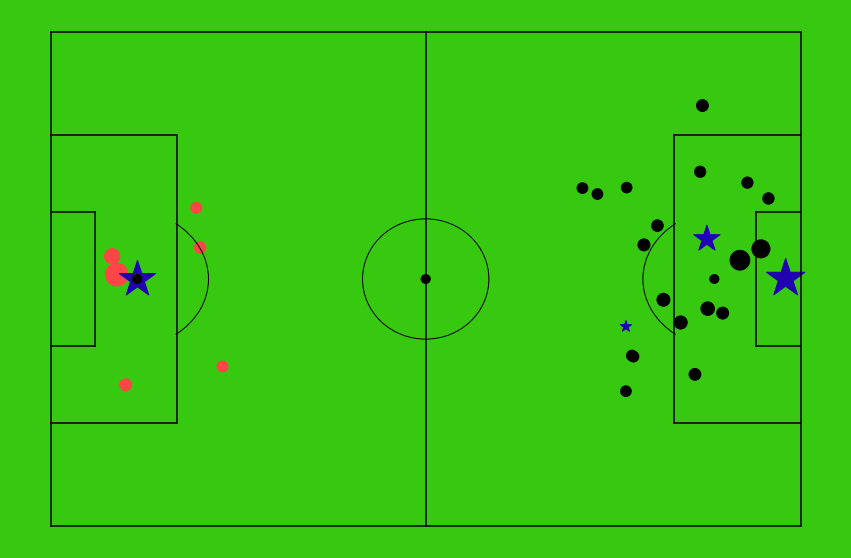

In [96]:
from matplotlib.patches import Arc

def createPitch():
    
    #Create figure
    fig=plt.figure(figsize=(15,10))
    ax=fig.add_subplot(1,1,1)
    
    
    fig.set_facecolor('#37C810')
    ax.patch.set_facecolor('black')
    


    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color="black")
    plt.plot([0,130],[90,90], color="black")
    plt.plot([130,130],[90,0], color="black")
    plt.plot([130,0],[0,0], color="black")
    plt.plot([65,65],[0,90], color="black")
    
    #Left Penalty Area
    plt.plot([21.91,21.91],[71.22,18.78],color="black")
    plt.plot([0,21.91],[71.22,71.22],color="black")
    plt.plot([21.91,0],[18.78,18.78],color="black")
    
    #Right Penalty Area
    plt.plot([130,108.09],[71.22,71.22],color="black")
    plt.plot([108.09,108.09],[71.22,18.78],color="black")
    plt.plot([108.09,130],[18.78,18.78],color="black")
    
    #Left 6-yard Box
    plt.plot([0,7.6685],[57.13,57.13],color="black")
    plt.plot([7.6685,7.6685],[57.13,32.86],color="black")
    plt.plot([7.6685,0],[32.86,32.86],color="black")
    
    #Right 6-yard Box
    plt.plot([130,122.331],[57.13,57.13],color="black")
    plt.plot([122.331,122.331],[57.13,32.86],color="black")
    plt.plot([122.331,130],[32.86,32.86],color="black")
    
    #Prepare Circles
    centreCircle = plt.Circle((65,45),10.95,color="black",fill=False)
    centreSpot = plt.Circle((65,45),0.8,color="black")
    leftPenSpot = plt.Circle((14.97,45),0.8,color="black")
    rightPenSpot = plt.Circle((115.03,45),0.8,color="black")
    
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
   
    #Prepare Arcs
    leftArc = Arc((13.2,45),height=25.22,width=28.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((116.8,45),height=25.22,width=28.3,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    #Tidy Axes
    plt.axis('off')


  


    plt.scatter(df_non_goal_shots_home['scaled_x'],df_non_goal_shots_home['scaled_y'], s=(df_non_goal_shots_home['xG'] * 900) + 100,c='black',alpha=1)
    plt.scatter(df_goals_home['scaled_x'],df_goals_home['scaled_y'], s=(df_goals_home['xG'] * 1800) + 100,marker = '*',c='#2000b1',alpha=1)
    
    
     # filter goals / non-shot goals
    df_goals_away= away[away["result"] == 'Goal']
    df_non_goal_shots_away = away[away["result"] != 'Goal'  ]
    
    

    plt.scatter(df_non_goal_shots_away['scaled_x'],df_non_goal_shots_away['scaled_y'], s=(df_non_goal_shots_away['xG'] * 900) + 100,c='#FF4545',alpha=1)
    plt.scatter(df_goals_away['scaled_x'],df_goals_away['scaled_y'], s=(df_goals_away['xG'] * 1800) + 100,marker = '*',c='#2000b1',alpha=1)
    


    plt.xlabel("Blue Star denotes goal : Size of dots corresponds to xG of the shot",c='black',fontsize = 18,fontfamily = "Helvetica")
    #Display Pitch
    plt.show()
    
createPitch()

In [ ]:
plt.gca().invert_yaxis()

In [98]:
# DARK VERSION

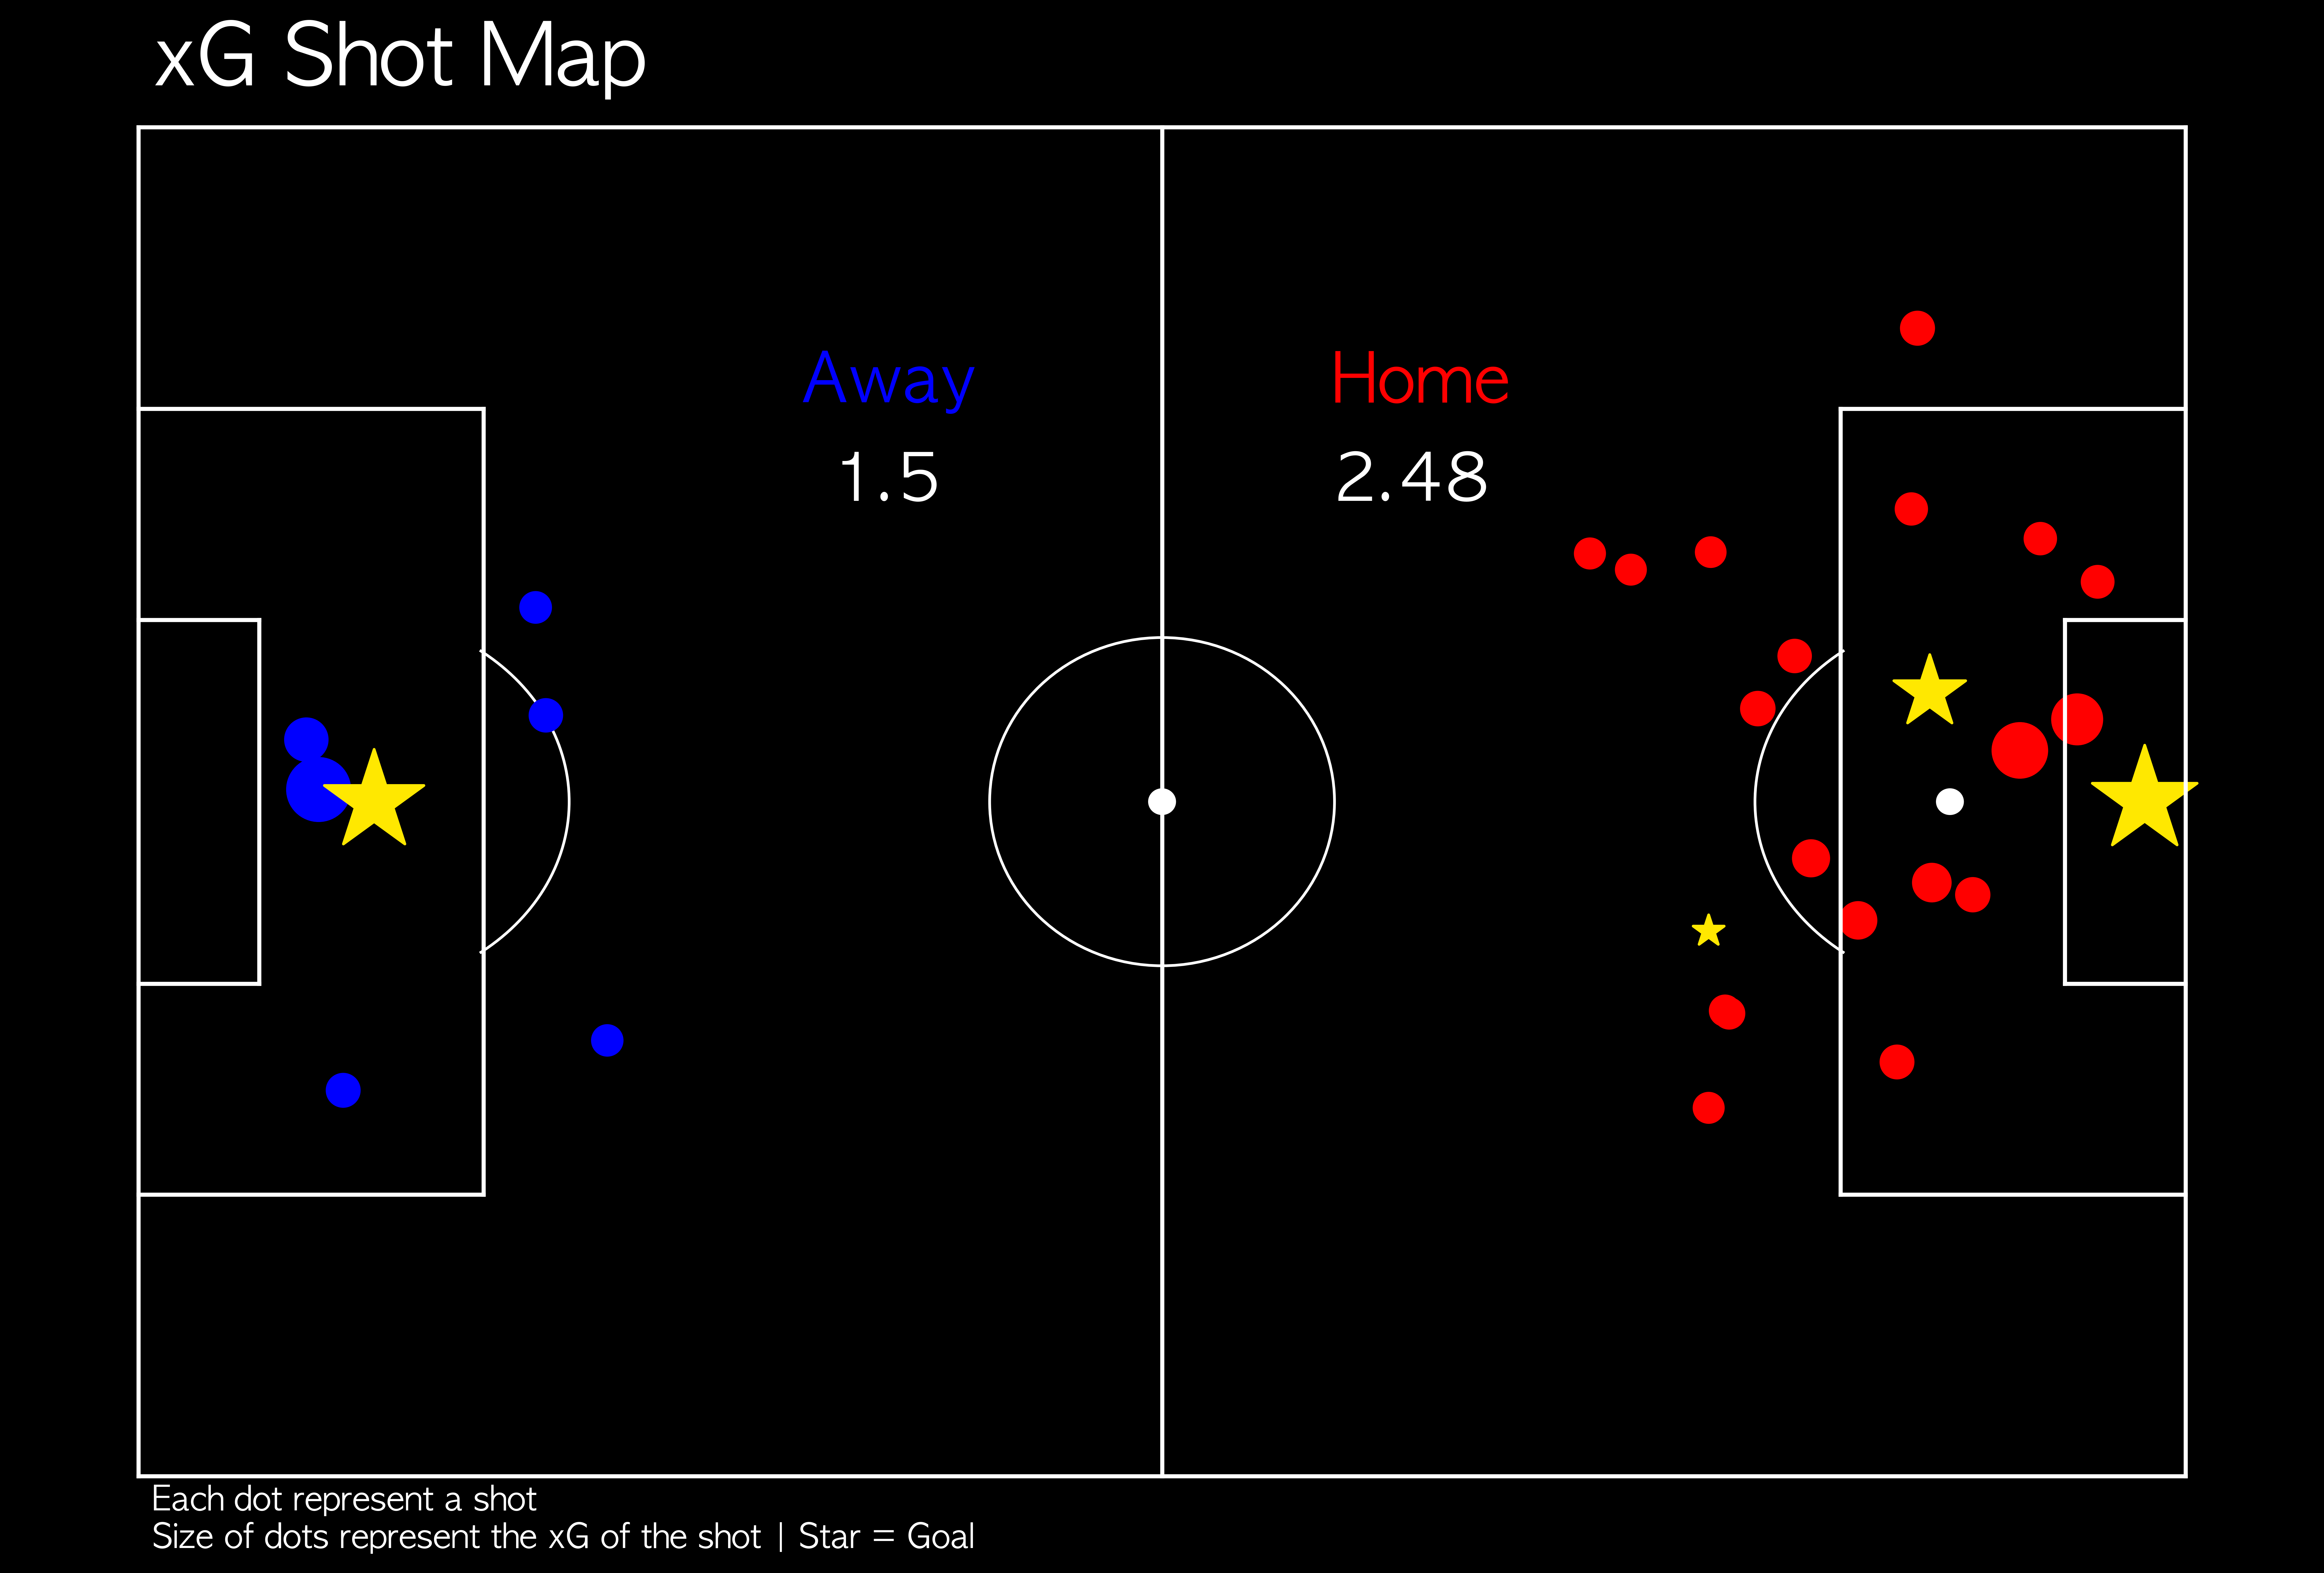

In [172]:
from matplotlib.patches import Arc

def createPitch():
    
    #Create figure
    fig=plt.figure(figsize=(15,10),dpi= 700)
    ax=fig.add_subplot(1,1,1)
    
    
    fig.set_facecolor('black')
    ax.patch.set_facecolor('black')
    
     #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color="white")
    plt.plot([0,130],[90,90], color="white")
    plt.plot([130,130],[90,0], color="white")
    plt.plot([130,0],[0,0], color="white")
    plt.plot([65,65],[0,90], color="white")
    
    #Left Penalty Area
    plt.plot([21.91,21.91],[71.22,18.78],color="white")
    plt.plot([0,21.91],[71.22,71.22],color="white")
    plt.plot([21.91,0],[18.78,18.78],color="white")
    
    #Right Penalty Area
    plt.plot([130,108.09],[71.22,71.22],color="white")
    plt.plot([108.09,108.09],[71.22,18.78],color="white")
    plt.plot([108.09,130],[18.78,18.78],color="white")
    
    #Left 6-yard Box
    plt.plot([0,7.6685],[57.13,57.13],color="white")
    plt.plot([7.6685,7.6685],[57.13,32.86],color="white")
    plt.plot([7.6685,0],[32.86,32.86],color="white")
    
    #Right 6-yard Box
    plt.plot([130,122.331],[57.13,57.13],color="white")
    plt.plot([122.331,122.331],[57.13,32.86],color="white")
    plt.plot([122.331,130],[32.86,32.86],color="white")
    
    #Prepare Circles
    centreCircle = plt.Circle((65,45),10.95,color="white",fill=False)
    centreSpot = plt.Circle((65,45),0.8,color="white")
    leftPenSpot = plt.Circle((14.97,45),0.8,color="white")
    rightPenSpot = plt.Circle((115.03,45),0.8,color="white")
    
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
   
    #Prepare Arcs
    leftArc = Arc((13.2,45),height=25.22,width=28.3,angle=0,theta1=310,theta2=50,color="white")
    rightArc = Arc((116.8,45),height=25.22,width=28.3,angle=0,theta1=130,theta2=230,color="white")
   

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    #Tidy Axes
    plt.axis('off')


  


    plt.scatter(df_non_goal_shots_home['scaled_x'],df_non_goal_shots_home['scaled_y'], s=(df_non_goal_shots_home['xG'] * 900) + 100,c='red',alpha=1,zorder=2)
    plt.scatter(df_goals_home['scaled_x'],df_goals_home['scaled_y'], s=(df_goals_home['xG'] * 1800) + 100,marker = '*',c='#FFE800',alpha=1,zorder=2)
    
    
     # filter goals / non-shot goals
    df_goals_away= away[away["result"] == 'Goal']
    df_non_goal_shots_away = away[away["result"] != 'Goal'  ]
    
    

    plt.scatter(df_non_goal_shots_away['scaled_x'],df_non_goal_shots_away['scaled_y'], s=(df_non_goal_shots_away['xG'] * 900) + 100,c='blue',alpha=1,zorder=2)
    plt.scatter(df_goals_away['scaled_x'],df_goals_away['scaled_y'], s=(df_goals_away['xG'] * 1800) + 100,marker = '*',c='#FFE800',alpha=1,zorder=2)
    


    plt.xlabel("Blue Star denotes goal : Size of dots corresponds to xG of the shot",c='black',fontsize = 18,fontfamily = "Helvetica")
    
    
    # Info text
    fig.text(
        x=0.39, y=.7, s='Away',
        ha='left',va='bottom',size=24,fontname="AppleGothic",fontweight="bold",
        color="blue"
    )
    fig.text(
        x=0.57, y=.7, s='Home',
        ha='left',va='bottom',size=24,fontname="AppleGothic",fontweight="bold",
        color="red"
    )
    fig.text(
        x=0.4, y=.65, s=awayXg.round(2) ,
        ha='left',va='bottom',size=24,fontname="AppleGothic",
        fontweight="bold",color="white"
    )
    fig.text(
        x=0.57, y=.65, s=homeXg.round(2) ,
        ha='left',va='bottom',size=24,fontname="AppleGothic",
        fontweight="bold",color="white"
    )
    
    fig.text(
        x=0.17, y=.86, s='xG Shot Map',
        ha='left',va='bottom',size=30
        ,fontname="AppleGothic",
        fontweight="bold",color="white"
    )
    
    fig.text(
        x=0.17, y=.12, s='Each dot represent a shot\nSize of dots represent the xG of the shot | Star = Goal',
        ha='left',va='bottom',size=12
        ,fontname="AppleGothic",
        fontweight="bold",color="white"
    )
    
    #Display Pitch
    plt.show()
    
    fig.savefig("AFC VS ARS.jpg")
createPitch()